In [1]:
# We'll be using Sklearn library for this task..
'''from sklearn.linear_model import LinearRegression 
'''
# pandas and numpy are used for data manipulation 
import pandas as pd 
import numpy as np 
# matplotlib and seaborn are used for plotting graphs 
import matplotlib.pyplot as plt 
import seaborn 
# fix_yahoo_finance is used to fetch data 
import yfinance as yf


[*********************100%***********************]  1 of 1 completed


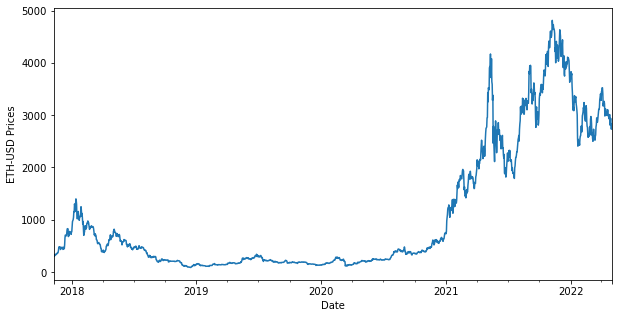

In [2]:
# Read data 
Df = yf.download('ETH-USD','2016-01-01','2022-05-01')
# Only keep close columns 
Df=Df[['Close']] 
# Drop rows with missing values 
Df= Df.dropna() 
# Plot the closing price of GLD 
Df.Close.plot(figsize=(10,5)) 
plt.ylabel("ETH-USD Prices")
plt.show()

In [3]:
print("trainging days =",Df.shape)

trainging days = (1635, 1)


In [4]:
futureDays = 25

In [5]:
Df["Prediction"] = Df[["Close"]].shift(-futureDays)


In [6]:
#x is the close price from Df minus the last 25 rows 

import numpy as np
x = np.array(Df.drop(["Prediction"], 1))[:-futureDays]


C:\Users\admin\AppData\Local\Temp/ipykernel_3816/3345385380.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = np.array(Df.drop(["Prediction"], 1))[:-futureDays]


In [7]:
#y is the rest of the Prediction price minus the last 25 days
y = np.array(Df["Prediction"])[:-futureDays]


In [8]:
x.shape

(1610, 1)

# train test split

In [9]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1)

# Decision Tree Regreesion

In [10]:
# Creating the decision tree regressor model


from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(min_samples_split=100, min_samples_leaf=1,random_state=0).fit(xtrain, ytrain)


In [11]:
xfuture = Df.drop(["Prediction"], 1)[:-futureDays]

C:\Users\admin\AppData\Local\Temp/ipykernel_3816/2900493697.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  xfuture = Df.drop(["Prediction"], 1)[:-futureDays]


In [12]:
#taking the last 25 days of data
xfuture = xfuture.tail(futureDays)
xfuture = np.array(xfuture)
t_pred = tree.predict(xfuture)


In [13]:
#that means we are trying to capture the last 25 of the x
pd.options.mode.chained_assignment = None
valid = Df[x.shape[0]:]
valid["tPredictions"] = t_pred


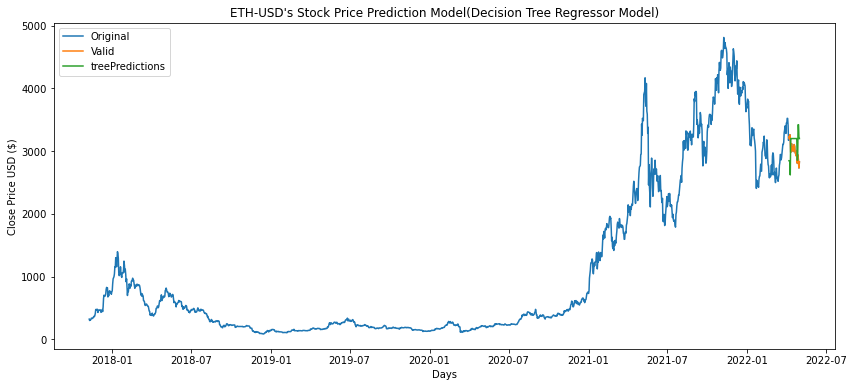

In [14]:

plt.figure(figsize=(14, 6))
plt.title("ETH-USD's Stock Price Prediction Model(Decision Tree Regressor Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")


plt.plot(Df["Close"])
plt.plot(valid[["Close", "tPredictions"]])
plt.legend(["Original", "Valid", "treePredictions"])
plt.show()

# Linear Regression

In [15]:
# creating the Linear Regression model


from sklearn.linear_model import LinearRegression
linear = LinearRegression(normalize= True).fit(xtrain, ytrain)

In [16]:
linear_pred = linear.predict(xfuture)

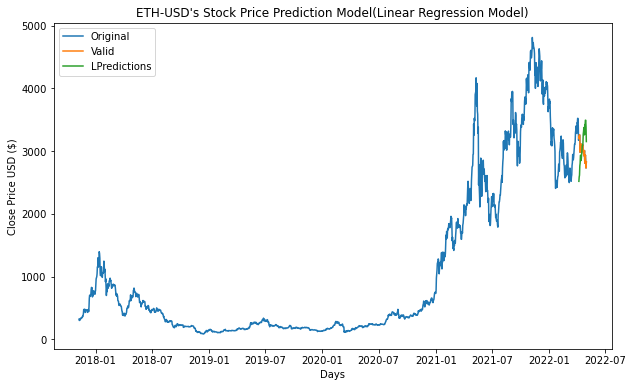

In [17]:

#valid = Df[x.shape[0]:] *****

valid["LPredictions"] = linear_pred
plt.figure(figsize=(10, 6))
plt.title("ETH-USD's Stock Price Prediction Model(Linear Regression Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(Df["Close"])
plt.plot(valid[["Close", "LPredictions"]])
plt.legend(["Original", "Valid", "LPredictions"])
plt.show()

In [18]:
#valid.head()

# random forest regression


In [19]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, min_samples_split=100, min_samples_leaf=1,
 random_state = 42)

In [20]:
randomforestreg = rf.fit(xtrain, ytrain)

In [21]:
rfpred = rf.predict(xfuture)
rfpred

array([2781.17035021, 2780.45057238, 2780.45057238, 2920.01841713,
       3082.5402055 , 3165.90293698, 3170.78125285, 3061.21465928,
       3081.42980933, 3179.51975202, 3195.23155949, 3195.01163813,
       3195.01163813, 3200.7138321 , 3241.62590484, 3250.93074526,
       3274.13749279, 3269.20005029, 3216.78339539, 3281.4794487 ,
       3281.4794487 , 3323.32333268, 3323.32333268, 3274.84027582,
       3208.7464119 ])

In [22]:
pd.options.mode.chained_assignment = None
Randomregressionpred = rfpred
#valid = Df[x.shape[0]:] ******
valid["RFPredictions"] = Randomregressionpred

# Ridge Regression

In [23]:
from sklearn.linear_model import Ridge

# Instantiate model with 1000 decision trees
ridge_model = Ridge(alpha = 0.00001,normalize = True).fit(xtrain,ytrain)

ridge_pred = ridge_model.predict(xfuture)

valid["RidgePredictions"] = ridge_pred

# Lasso Regression

In [24]:
from sklearn.linear_model import Lasso

# Instantiate model with 1000 decision trees
lasso_model = Lasso(alpha = 0.00001,normalize = True).fit(xtrain,ytrain)

lasso_pred = lasso_model.predict(xfuture)

valid["LassoPredictions"] = lasso_pred

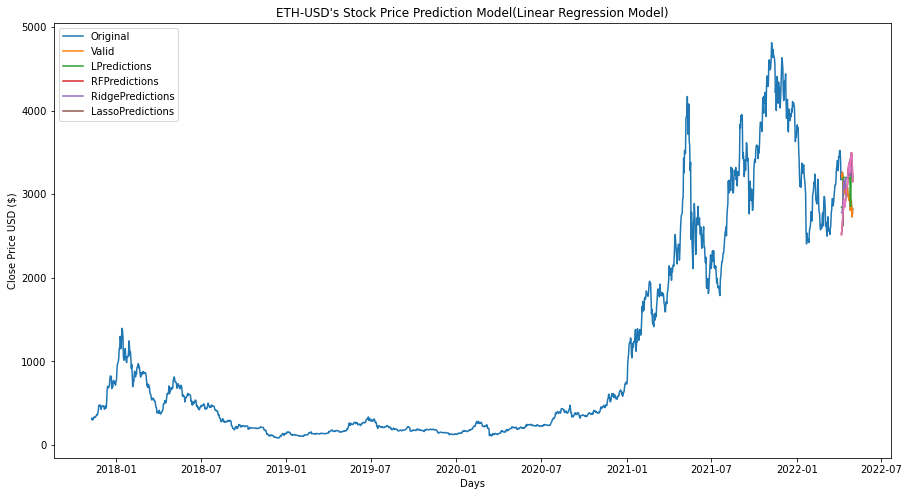

In [25]:
import datetime
plt.figure(figsize=(15, 8))
plt.title("ETH-USD's Stock Price Prediction Model(Linear Regression Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(Df["Close"])
plt.plot(valid[["Close","tPredictions","LPredictions","RFPredictions","RidgePredictions","LassoPredictions"]])
plt.legend(["Original", "Valid", "LPredictions","RFPredictions","RidgePredictions","LassoPredictions"])
plt.show()

In [26]:
valid.head()

,Close,Prediction,tPredictions,LPredictions,RFPredictions,RidgePredictions,LassoPredictions
Date,,,,,,,
2022-04-07,3233.274658,NaN,2846.721645,2518.188543,2781.170350,2518.174346,2518.188098
2022-04-08,3192.073975,NaN,2846.721645,2587.882626,2780.450572,2587.867731,2587.882159
2022-04-09,3261.916260,NaN,2846.721645,2616.491694,2780.450572,2616.476514,2616.491218
2022-04-10,3211.866943,NaN,2620.317963,2764.041988,2920.018417,2764.025332,2764.041466
2022-04-11,2981.052246,NaN,3200.266617,2805.613614,3082.540205,2805.596542,2805.613079


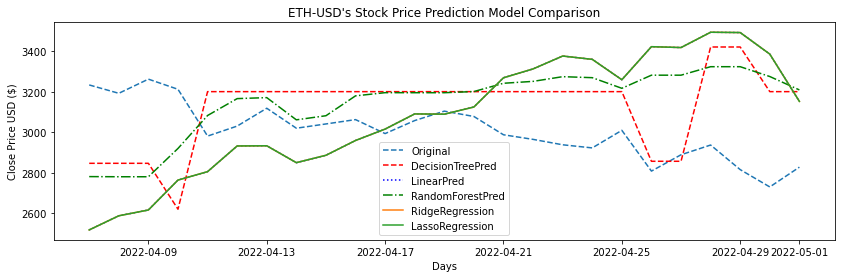

In [27]:
plt.figure(figsize=(14, 4))
plt.title("ETH-USD's Stock Price Prediction Model Comparison")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(valid[["Close"]],linestyle = 'dashed')
plt.plot(valid[["tPredictions"]],linestyle = '--',color = 'r')
plt.plot(valid[["LPredictions"]],linestyle = ':',color = 'b')
plt.plot(valid[["RFPredictions"]],linestyle = 'dashdot',color = 'g')
plt.plot(valid[["RidgePredictions"]],linestyle = 'solid')
plt.plot(valid[["LassoPredictions"]],linestyle = 'solid')

plt.legend(["Original", "DecisionTreePred", "LinearPred","RandomForestPred","RidgeRegression","LassoRegression"])
plt.show()

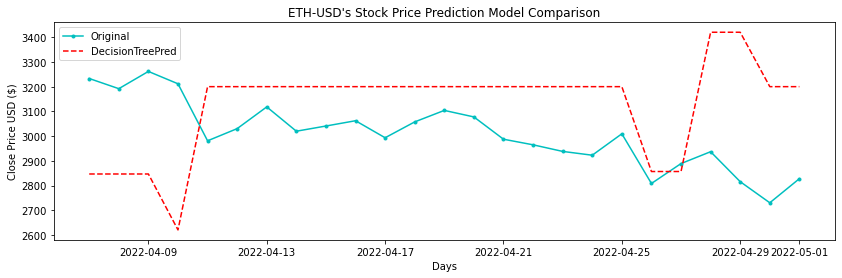

In [28]:
plt.figure(figsize=(14, 4))
plt.title("ETH-USD's Stock Price Prediction Model Comparison")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(valid[["Close"]],marker = '.',color ='c')
plt.plot(valid[["tPredictions"]],linestyle = '--',color = 'r')
plt.legend(["Original", "DecisionTreePred"])
plt.show()

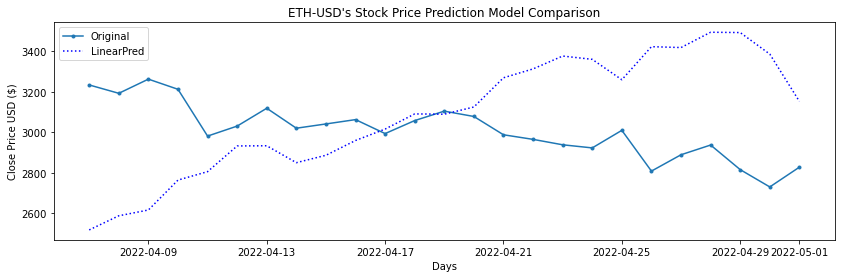

In [29]:
plt.figure(figsize=(14, 4))
plt.title("ETH-USD's Stock Price Prediction Model Comparison")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(valid[["Close"]],marker = '.')
plt.plot(valid[["LPredictions"]],linestyle = ':',color = 'b')
plt.legend(["Original", "LinearPred"])
plt.show()

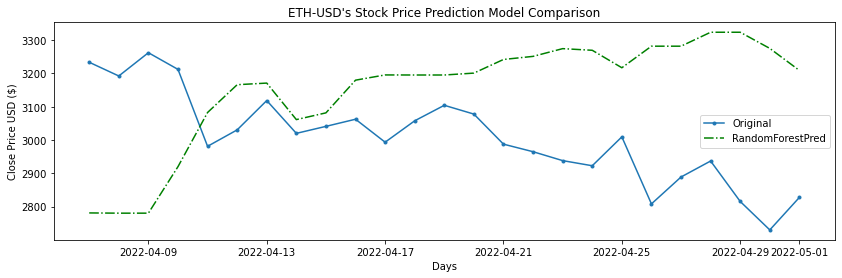

In [30]:
plt.figure(figsize=(14, 4))
plt.title("ETH-USD's Stock Price Prediction Model Comparison")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(valid[["Close"]],marker = '.')
plt.plot(valid[["RFPredictions"]],linestyle = 'dashdot',color = 'g')

plt.legend(["Original", "RandomForestPred"])
plt.show()

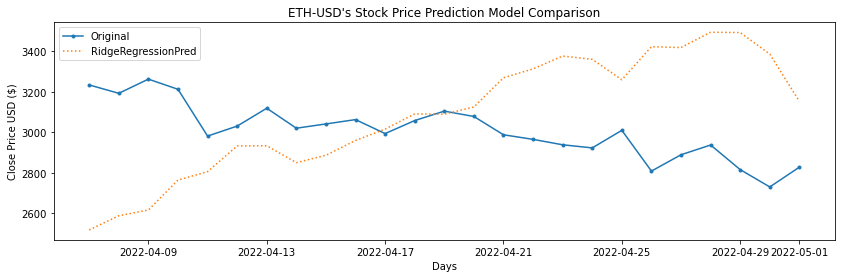

In [31]:
plt.figure(figsize=(14, 4))
plt.title("ETH-USD's Stock Price Prediction Model Comparison")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(valid[["Close"]],marker = '.')
plt.plot(valid[["RidgePredictions"]],linestyle = ':')

plt.legend(["Original", "RidgeRegressionPred"])
plt.show()

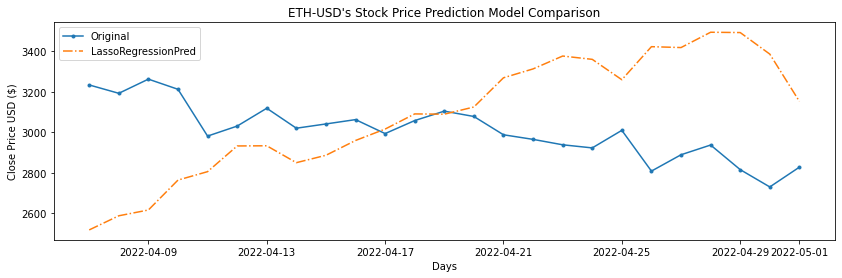

In [32]:
plt.figure(figsize=(14, 4))
plt.title("ETH-USD's Stock Price Prediction Model Comparison")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(valid[["Close"]],marker = '.')
plt.plot(valid[["LassoPredictions"]],linestyle = '-.')

plt.legend(["Original", "LassoRegressionPred"])
plt.show()

# residuals

Text(0.5, 1.0, 'Residual plot Decision Tree Regression')

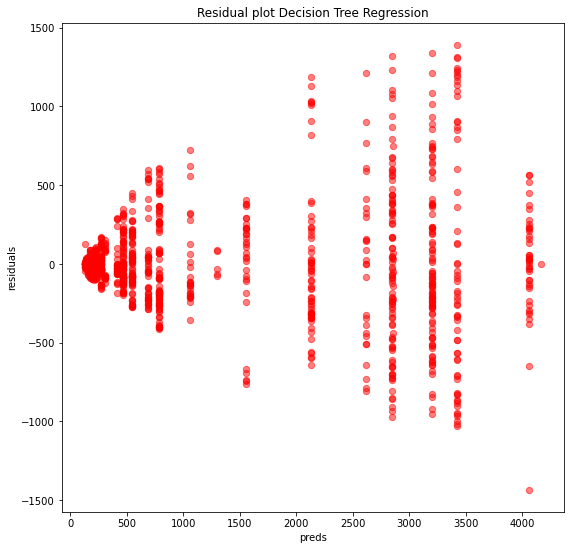

In [33]:
plt.rcParams['figure.figsize'] = (9.0, 9.0)
preds = pd.DataFrame({"preds":tree.predict(xtrain), "true":ytrain})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter",s = 40, alpha = 0.5,color = 'red')
plt.title("Residual plot Decision Tree Regression")

Text(0.5, 1.0, 'Residual plot Random Forest Regression')

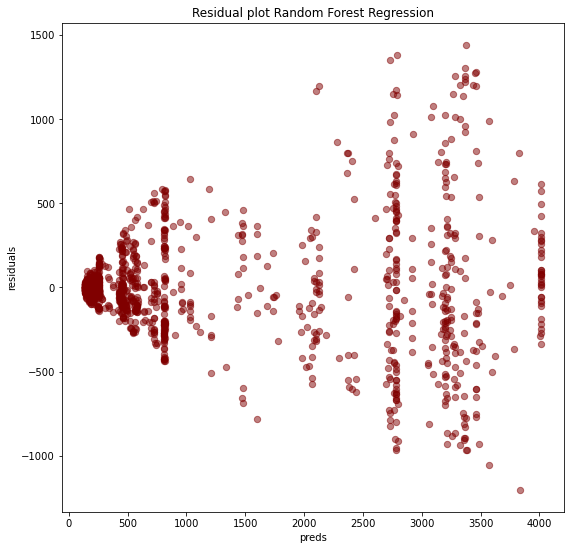

In [34]:
plt.rcParams['figure.figsize'] = (9.0, 9.0)
preds = pd.DataFrame({"preds":rf.predict(xtrain), "true":ytrain})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter",s = 40, alpha = 0.5,color= 'maroon')
plt.title("Residual plot Random Forest Regression")

In [35]:
preds

,preds,true,residuals
0,810.822654,526.439026,-284.383628
1,2780.450572,2150.040283,-630.410289
2,4016.900785,4239.981445,223.080660
3,672.936503,1040.233032,367.296529
4,196.439889,185.912842,-10.527048
...,...,...,...
1444,482.514064,694.148010,211.633947
1445,246.542671,217.203003,-29.339668
1446,446.603277,462.960541,16.357264
1447,195.173511,208.709045,13.535535


Text(0.5, 1.0, 'Residual plot Linear Regression')

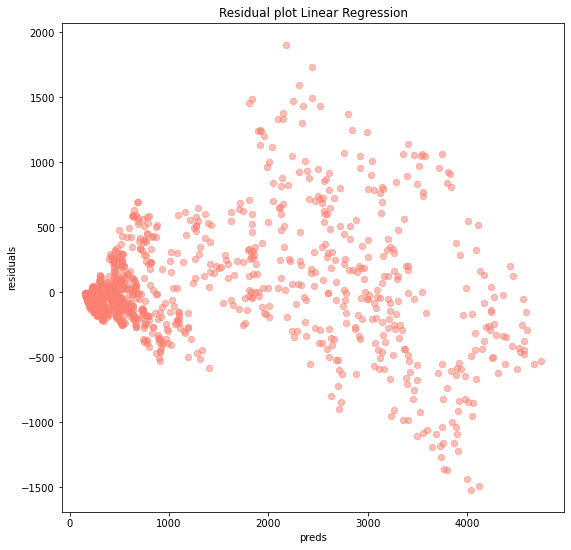

In [36]:
plt.rcParams['figure.figsize'] = (9.0, 9.0)
preds = pd.DataFrame({"preds":linear.predict(xtrain), "true":ytrain})
preds["residuals"] = preds["true"] - preds["preds"]

preds.plot(x = "preds", y = "residuals",kind = "scatter",color = 'salmon',s = 40, alpha = 0.5)
plt.title("Residual plot Linear Regression")

Text(0.5, 1.0, 'Residual plot Ridge Regression')

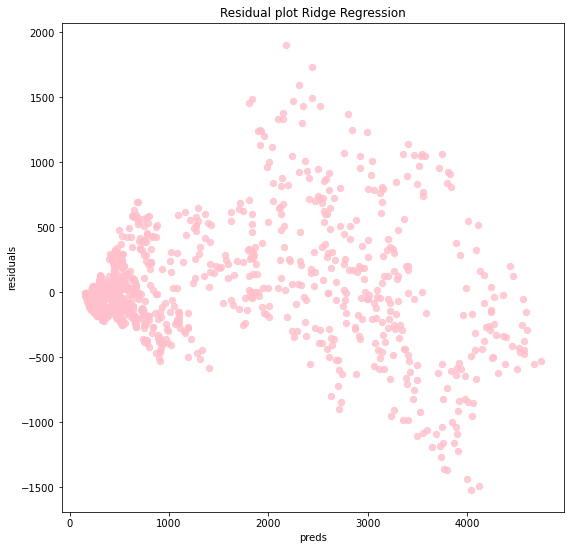

In [37]:
plt.rcParams['figure.figsize'] = (9.0, 9.0)
preds = pd.DataFrame({"preds":ridge_model.predict(xtrain), "true":ytrain})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter",color = 'pink',s = 40, alpha = 0.8)
plt.title("Residual plot Ridge Regression")

Text(0.5, 1.0, 'Residual plot in Lasso')

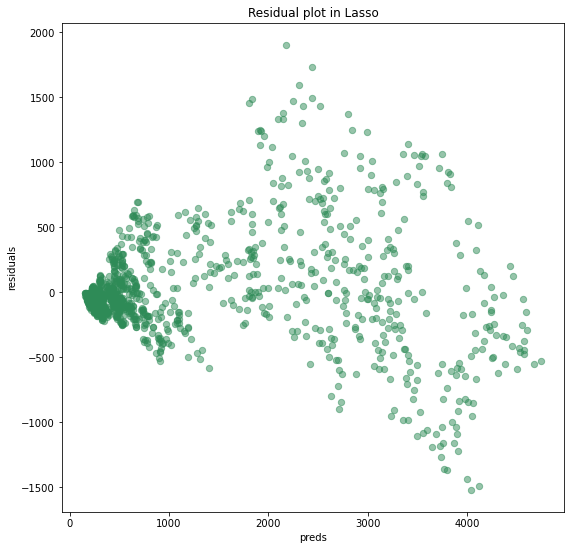

In [38]:
plt.rcParams['figure.figsize'] = (9.0, 9.0)
preds = pd.DataFrame({"preds":lasso_model.predict(xtrain), "true":ytrain})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter",s = 40, alpha = 0.5,color = 'seagreen')
plt.title("Residual plot in Lasso")

# Model Metrics

In [39]:
from sklearn.metrics import mean_absolute_error as mae
rf_score = mae(xfuture,rfpred)
print('Random Forest model Mean Absolute Error=%.3f' % (rf_score))
ridge_score = mae(xfuture,ridge_pred)
print('Ridge Regression model Mean Absolute Error%.3f' % (ridge_score))
t_score = mae(xfuture,t_pred)
print('Decision tree Mean Absolute Error%.3f' % (t_score))
lasso_score = mae(xfuture,lasso_pred)
print('Lasso Regression Mean Absolute Error%.3f' % (lasso_score))
linear_score = mae(xfuture,linear_pred)
print('Linear Regression Model Mean Absolute Error%.3f' % (linear_score))

Random Forest model Mean Absolute Error=152.320
Ridge Regression model Mean Absolute Error17.492
Decision tree Mean Absolute Error218.305
Lasso Regression Mean Absolute Error17.473
Linear Regression Model Mean Absolute Error17.472


In [40]:
from sklearn.metrics import mean_squared_error as mse
rf_score = mse(xfuture,rfpred,squared = False)
print('Random Forest model RMSE score%.3f' % (rf_score))
ridge_score = mse(xfuture,ridge_pred,squared = False)
print('Ridge Regression model RMSE score%.3f' % (ridge_score))
t_score = mse(xfuture,t_pred,squared = False)
print('Decision tree RMSE score %.3f' % (t_score))
lasso_score = mse(xfuture,lasso_pred,squared = False)
print('Lasso Regression RMSE score %.3f' % (lasso_score))
linear_score = mse(xfuture,linear_pred,squared = False)
print('Linear Regression Model RMSE score %.3f' % (linear_score))

Random Forest model RMSE score165.312
Ridge Regression model RMSE score19.437
Decision tree RMSE score 261.156
Lasso Regression RMSE score 19.419
Linear Regression Model RMSE score 19.418
